In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

# load dataset

In [2]:
df = pd.read_csv('../Dataset/nyc-rolling-sales.csv', sep=',')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# EDA

## Data understanding

In [3]:
# shape of the data
df.shape

(84548, 22)

In [4]:
# columns of the data
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [5]:
# data types of the columns
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [6]:
# describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


## Data Preparation

In [7]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
# memilih kolom untuk diolah
df = df[['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE']]

In [9]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BUILDING CLASS AT PRESENT       84548 non-null  object
 5   RESIDENTIAL UNITS               84548 non-null  int64 
 6   COMMERCIAL UNITS                84548 non-null  int64 
 7   TOTAL UNITS                     84548 non-null  int64 
 8   LAND SQUARE FEET                84548 non-null  object
 9   GROSS SQUARE FEET               84548 non-null  object
 10  YEAR BUILT                      84548 non-null  int64 
 11  TAX CLASS AT TIME OF SALE       84548 non-null  int64 
 12  BUILDING CLASS AT TIME OF SALE  84548 non-null

In [11]:
# mengubah data sale date menjadi tahun
df['SALE DATE'] = pd.to_datetime(df['SALE DATE']).dt.year

In [12]:
# mengubah data menjadi numerik
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

In [13]:
# mengisi missing value dengan 0 di kolom sale price
df['SALE PRICE'] = df['SALE PRICE'].fillna(0)

In [14]:
# mengubah data borough
df['BOROUGH'] = df['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})

In [15]:
# Merubah tipe data menjadi kategorial
categorical = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
         'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  object  
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BUILDING CLASS AT PRESENT       84548 non-null  category
 5   RESIDENTIAL UNITS               84548 non-null  int64   
 6   COMMERCIAL UNITS                84548 non-null  int64   
 7   TOTAL UNITS                     84548 non-null  int64   
 8   LAND SQUARE FEET                58296 non-null  float64 
 9   GROSS SQUARE FEET               56936 non-null  float64 
 10  YEAR BUILT                      84548 non-null  int64   
 11  TAX CLASS AT TIME OF SALE       84548 non-null  category
 12  BUILDING CLASS AT 

In [17]:
# menghapus missing value
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].dropna()
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].dropna()

In [18]:
# menghapus nilai yang 0
df = df[df['YEAR BUILT'] != 0]
df = df[df['LAND SQUARE FEET'] != 0]
df = df[df['GROSS SQUARE FEET'] != 0]
df = df[df["TOTAL UNITS"] != 0]

In [19]:
# membuat kolom baru umur bangunan
df['AGE'] = df['SALE DATE'] - df['YEAR BUILT']

In [20]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017,117
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,28,3,31,4616.0,18690.0,1900,2,C7,0.0,2016,116
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,16,1,17,2212.0,7803.0,1900,2,C7,0.0,2016,116
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016,103
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016,116


<Axes: xlabel='AGE', ylabel='SALE PRICE'>

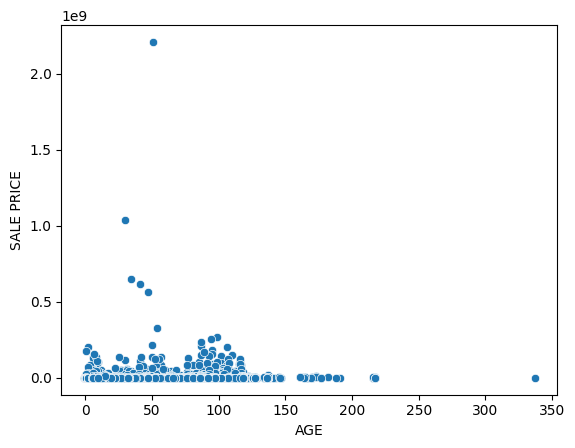

In [21]:
# cek outlier
sns.scatterplot(data=df, x='AGE', y='SALE PRICE')

In [22]:
place_sales = df[(df['SALE PRICE'] > 200000) & (df['SALE PRICE'] < 900000)]

<Axes: xlabel='AGE', ylabel='SALE PRICE'>

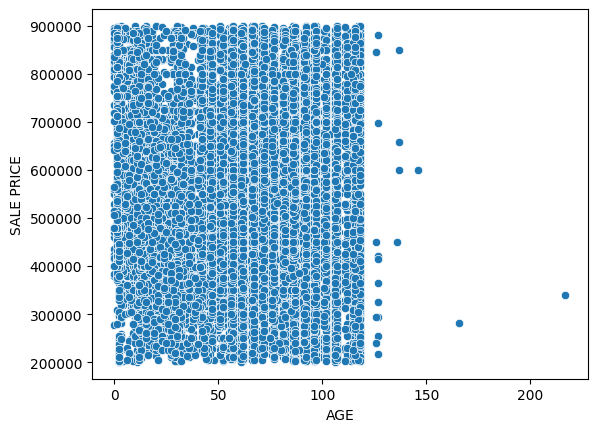

In [23]:
#cek apakah outlier masih ada
sns.scatterplot(data=place_sales, x='AGE', y='SALE PRICE')

In [24]:
# cek duplikasi data
place_sales.duplicated().sum()

280

In [25]:
# menghapus duplikasi data
place_sales = place_sales.drop_duplicates()

In [26]:
# mengecek apakah masih ada duplikasi data
place_sales.duplicated().sum()

0

## Feature Understanding

<Figure size 1200x500 with 0 Axes>

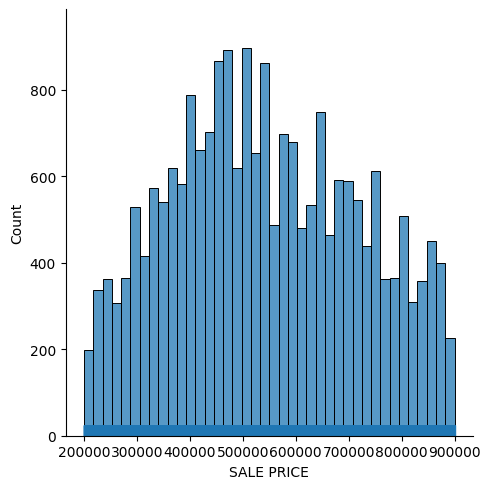

In [27]:
plt.figure(figsize=(12,5))
sns.displot(place_sales['SALE PRICE'], bins=40, rug=True)
plt.show()

<Figure size 1200x500 with 0 Axes>

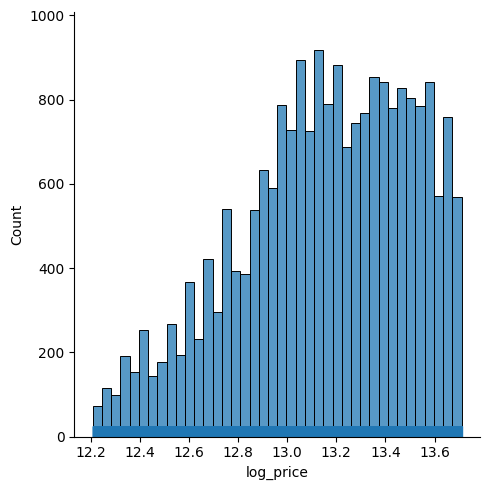

In [28]:
place_sales["log_price"] = np.log(place_sales["SALE PRICE"])
plt.figure(figsize=(12,5))
sns.displot(place_sales['log_price'], bins=40, rug=True)
plt.show()

In [29]:
print(place_sales['SALE PRICE'].skew())

0.12106830264198096


<Axes: title={'center': 'penjualan per tahun'}, xlabel='tahun', ylabel='jumlah penjualan'>

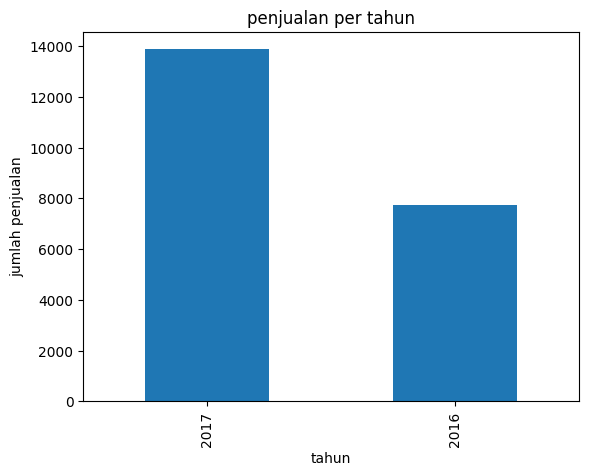

In [30]:
place_sales['SALE DATE'].value_counts().plot(kind='bar', title='penjualan per tahun', xlabel='tahun', ylabel='jumlah penjualan')

<center>Penjulan yang paling banyak terjadi pada tahun 2017

<Axes: title={'center': 'Top 10 tahun bagunan'}, xlabel='tahun', ylabel='jumlah bangunan'>

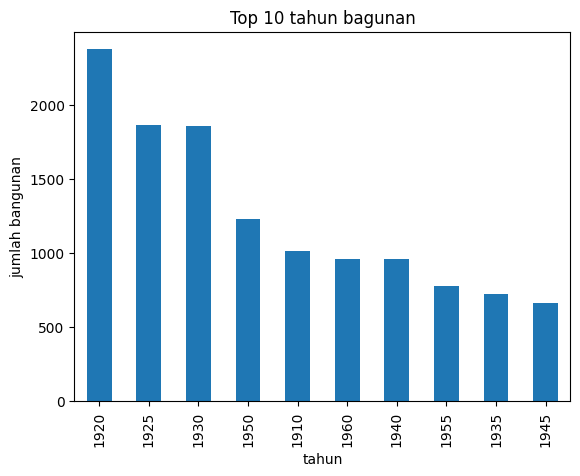

In [31]:
place_sales["YEAR BUILT"].value_counts().head(10).plot(kind='bar', title='Top 10 tahun bagunan', xlabel='tahun', ylabel='jumlah bangunan')

## Feature Relationship

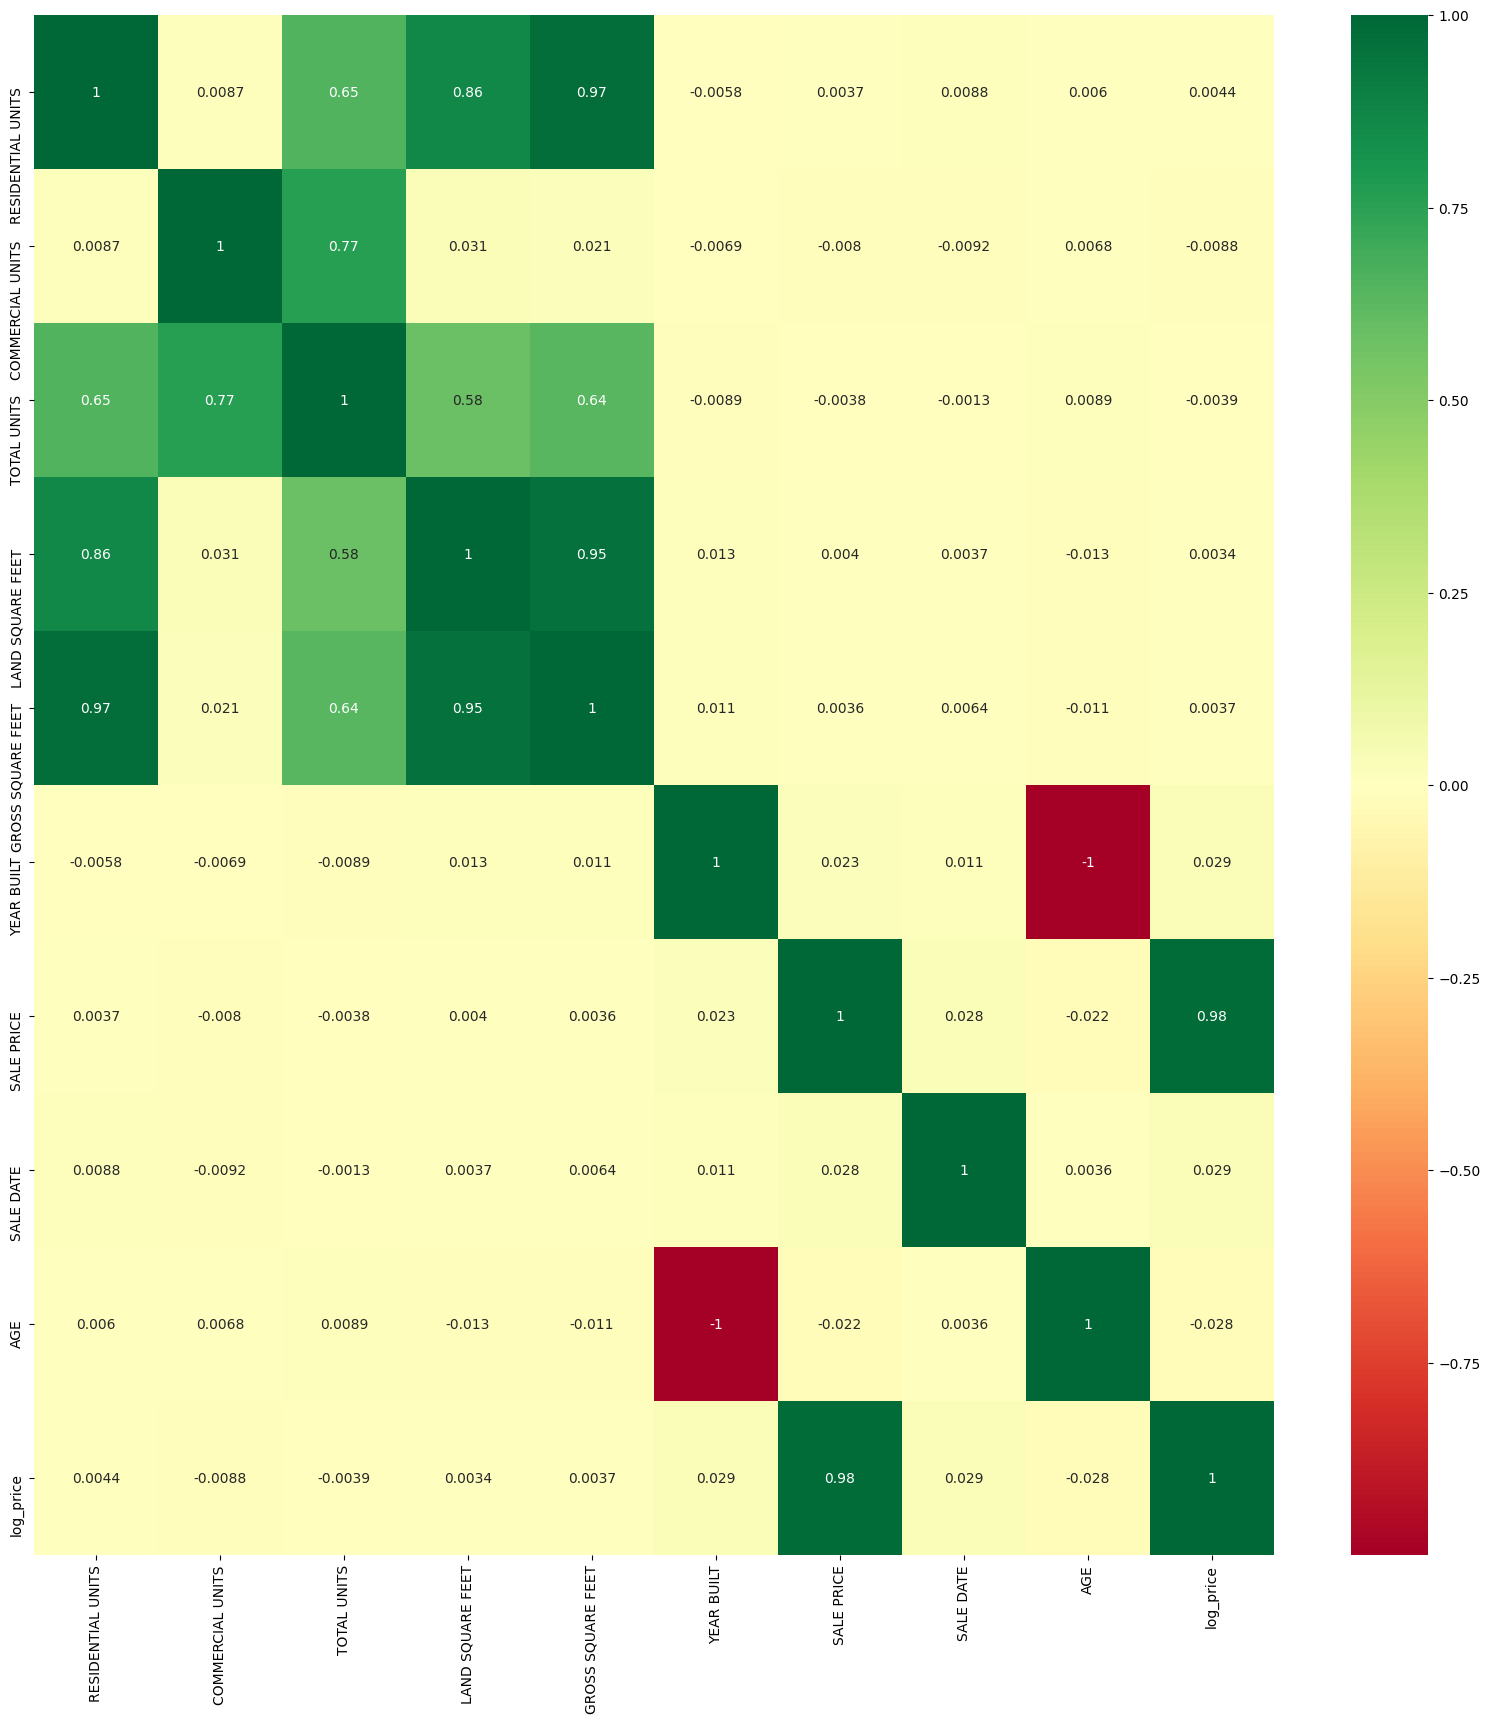

In [32]:
# heatmap
corrmat = place_sales.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# plot heat map
g=sns.heatmap(place_sales[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Measure of central tendency

In [33]:
# Measure of central tendency (mean, median, mode)
mean = place_sales['SALE PRICE'].mean()
median = place_sales['SALE PRICE'].median()
mode = place_sales['SALE PRICE'].mode()

print('Mean: ', mean)
print('Median: ', median)
print('Mode: ', mode)

Mean:  543483.4057092625
Median:  530000.0
Mode:  0    600000.0
dtype: float64


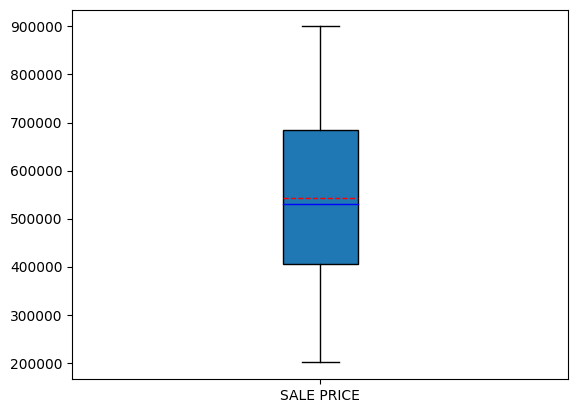

In [34]:
plt.boxplot((place_sales['SALE PRICE']), labels=['SALE PRICE'], 
            showmeans=True, meanline=True, showfliers=False, meanprops={'color':'red'},
            medianprops={'color':'blue'}, patch_artist=True )
plt.show()

# Measure of dispersion

In [35]:
# Measure of dispersion (range, variance, standard deviation)
range = place_sales['SALE PRICE'].max() - place_sales['SALE PRICE'].min()
variance = place_sales['SALE PRICE'].var()
std = place_sales['SALE PRICE'].std()

print('Range: ', range)
print('Variance: ', variance)
print('Standard Deviation: ', std)

Range:  699382.0
Variance:  31086288773.478947
Standard Deviation:  176313.04198350996


<Figure size 1000x600 with 0 Axes>

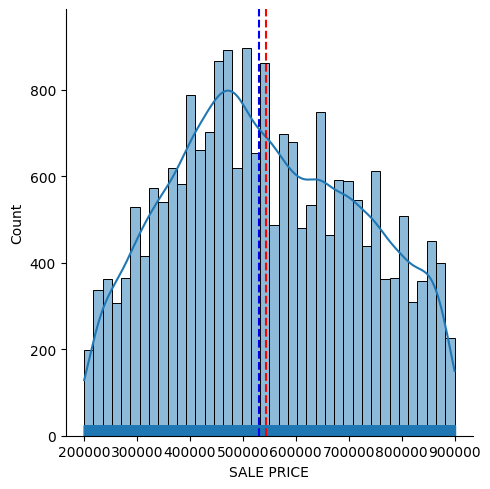

In [36]:
# probability distribution
plt.figure(figsize=(10,6))
sns.displot(place_sales['SALE PRICE'], bins=40, rug=True, kde=True)
plt.axvline(place_sales['SALE PRICE'].mean(), color='r', linestyle='--')
plt.axvline(place_sales['SALE PRICE'].median(), color='b', linestyle='--')
plt.show()

c:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability')

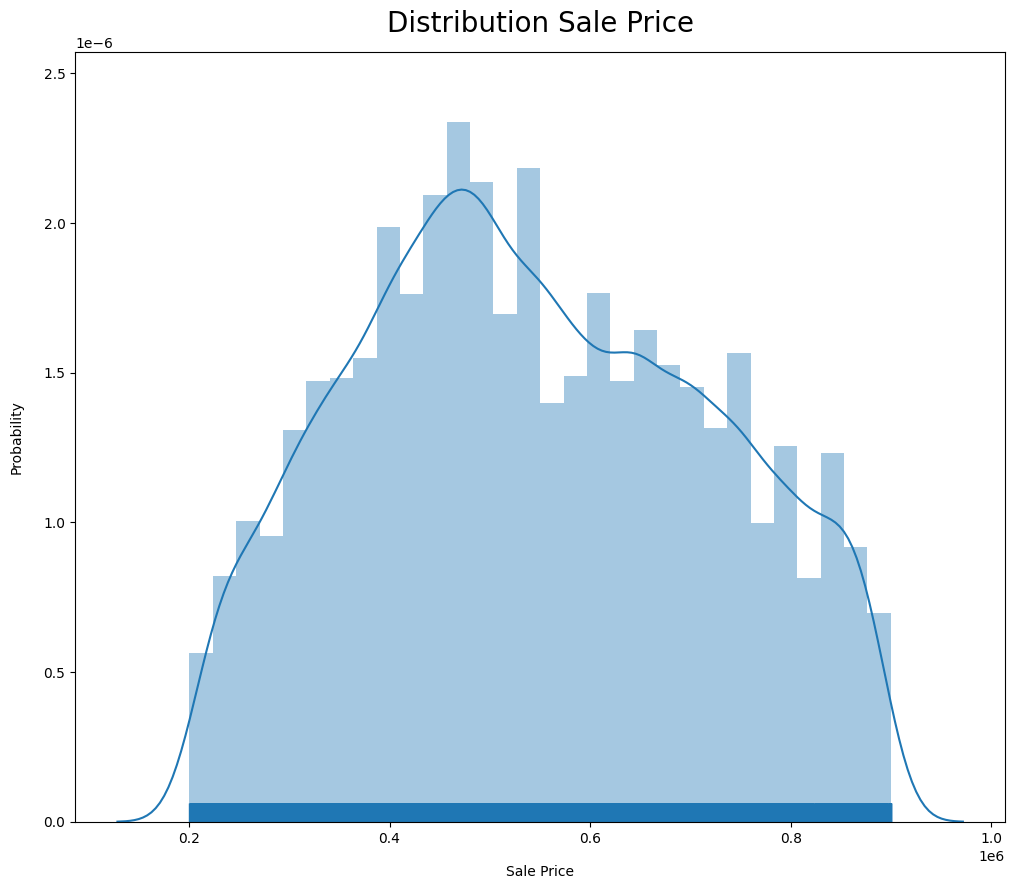

In [37]:
plt.figure(figsize=(12,10))
sns.distplot(place_sales['SALE PRICE'], kde=True, bins=30, rug=True)
plt.title('Distribution Sale Price', y=1.015, fontsize=20)
plt.xlabel('Sale Price', labelpad=14)
plt.ylabel('Probability', labelpad=14)

## Convidence Interval

In [38]:
# Convidence Interval
n = len(place_sales['SALE PRICE'])
confidence = 0.95

In [39]:
se = std / np.sqrt(n)
z = stats.norm.ppf((1 + confidence) / 2)
h = se * z

In [40]:
print('Confidence Interval: ', mean-h, mean+h)

Confidence Interval:  541132.8802692485 545833.9311492764


In [ ]:
# rata rata dari sale price 

## Hypothesis Testing

In [76]:
from statsmodels.stats.weightstats import ztest

Mencari apakah ada perbedaan penjualan rumah pada brookly dan manhattan

In [99]:
place_sales["BOROUGH"].value_counts()

Queens           9023
Staten Island    4927
Brooklyn         3862
Bronx            2803
Manhattan         999
Name: BOROUGH, dtype: int64

In [100]:
Bronx = place_sales[place_sales['BOROUGH'] == 'Bronx']
mean_Bronx = Bronx['SALE PRICE'].mean()
std_Bronx = Bronx['SALE PRICE'].std()
n_Bronx = len(Bronx)

print('Mean Sale Price Bronx: ', mean_Bronx)
print('Standard Deviation Sale Price Bronx: ', std_Bronx)
print('Number of Sale Price Bronx: ', n_Bronx)


Mean Sale Price Bronx:  481990.38316089904
Standard Deviation Sale Price Bronx:  145022.70292956915
Number of Sale Price Bronx:  2803


In [101]:
manhattan = place_sales[place_sales['BOROUGH'] == 'Manhattan']
mean_manhattan = manhattan['SALE PRICE'].mean()
std_manhattan = manhattan['SALE PRICE'].std()
n_manhattan = len(manhattan)

print('Mean Sale Price Manhattan: ', mean_manhattan)
print('Standard Deviation Sale Price Manhattan: ', std_manhattan)
print('Number of Sale Price Manhattan: ', n_manhattan)

Mean Sale Price Manhattan:  674686.0700700701
Standard Deviation Sale Price Manhattan:  155872.94782324904
Number of Sale Price Manhattan:  999


In [102]:
z, p= ztest(Bronx['SALE PRICE'], manhattan['SALE PRICE'], alternative='two-sided')
print('z-score: ', z)
print('p-value: ', p)

if p < 0.05:
    print('Reject H0')
else:
    print('Accept H0')

z-score:  -35.34655193847248
p-value:  1.1326640401621195e-273
Reject H0


Kesimpulan : Karena didapat nilai p-value nya > 0.05 yaitu 1.2, maka H0 ditolak yaitu rata-rata harga rumah di Manhattan sama dengan rata-rata harga rumah di Bronx